In [1]:
import pandas as pd
import geopandas as gpd
import PIL
import io

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
data = pd.read_csv('../input/covid19-realtime-dataset/time_series_covid19_confirmed_global.csv')

In [3]:
#group the data by the country
data = data.groupby('Country/Region').sum()

In [4]:
#drop lat and lot colums
data = data.drop(columns = ['Lat','Long'])

In [5]:
data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,208289,208324,208324,208432,208435,208435,208502,208545,208552,208669
Albania,0,0,0,0,0,0,0,0,0,0,...,334113,334124,334135,334144,334153,334157,334157,334167,334177,334187
Algeria,0,0,0,0,0,0,0,0,0,0,...,271354,271360,271364,271369,271369,271376,271376,271378,271385,271386
Andorra,0,0,0,0,0,0,0,0,0,0,...,47820,47820,47820,47820,47839,47839,47839,47839,47839,47839
Angola,0,0,0,0,0,0,0,0,0,0,...,105184,105184,105184,105184,105184,105184,105184,105184,105184,105184


In [6]:
#create a transpose of the dataframe
data_transposed = data.T

In [7]:
data_transposed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


<AxesSubplot:>

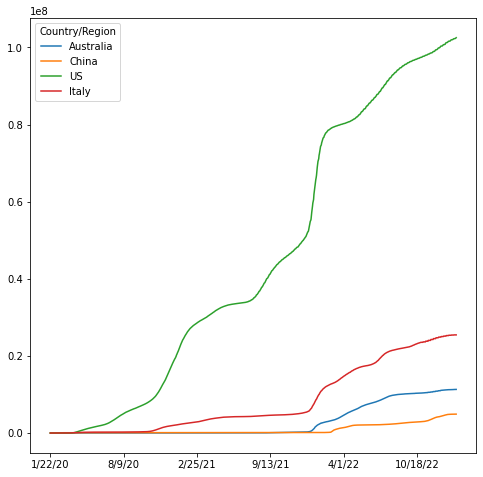

In [8]:
data_transposed.plot(y = ['Australia', 'China','US','Italy'], use_index = True, 
                     figsize = (8,8))

In [9]:
#read in the world map shape file
world = gpd.read_file ('../input/worldmap/World_Map.shp')

<AxesSubplot:>

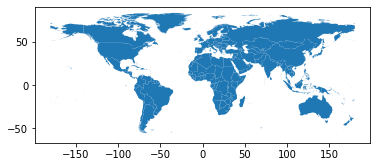

In [10]:
world.plot()

In [11]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [12]:
world.head(20)

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
5,Angola,"MULTIPOLYGON (((11.75083 -16.75528, 11.77500 -..."
6,American Samoa,"MULTIPOLYGON (((-170.54251 -14.29750, -170.546..."
7,Argentina,"MULTIPOLYGON (((-68.60861 -54.89140, -68.62056..."
8,Australia,"MULTIPOLYGON (((158.88217 -54.71139, 158.87967..."
9,Bahrain,"MULTIPOLYGON (((50.81249 25.64222, 50.79250 25..."


In [13]:
world.replace('Viet Nam','Vietnam',inplace=True)
world.replace('Brunei Darussalam','Brunei',inplace=True)
world.replace('Cape Verde','Cabo Verde',inplace=True)
world.replace('Democratic Republic of the Congo','Congo (Kinshasa)',inplace=True)
world.replace('Congo','Congo(Brazzaville)',inplace=True)
world.replace('Czech Republic','Czechia',inplace=True)
world.replace('Swaziland','Eswatini',inplace=True)
world.replace('Iran(Islamic Republic of)','Iran',inplace=True)
world.replace('Korea, Republic of ','Korea,South',inplace=True)
world.replace("Lao People's Democratic Republic",'Laos',inplace=True)
world.replace('Libyan Arab Jamahiriya','Libya',inplace=True)
world.replace('Republic of Moldova','Moldova',inplace=True)
world.replace('The former Yugoslav Republic of Macedonia','North Macedonia',inplace=True)
world.replace('Syrian Arab Republic','Syria',inplace=True)
world.replace('Taiwan','Taiwan*',inplace=True)
world.replace('United Republic of Tanzania','Tanzania',inplace=True)
world.replace('United States','US',inplace=True)
world.replace('Palestine','West Bank and Gaza',inplace=True)

In [14]:
#checking the names of the countries for any discrepancies
#for index,row in data.iterrows():
    #if index not in world['NAME'].to_list():
       #print(index + ' is not in the list ')
    #else:
        #pass

In [15]:
#merging the data with world
merge = world.join(data, on = 'NAME',how = 'right' )

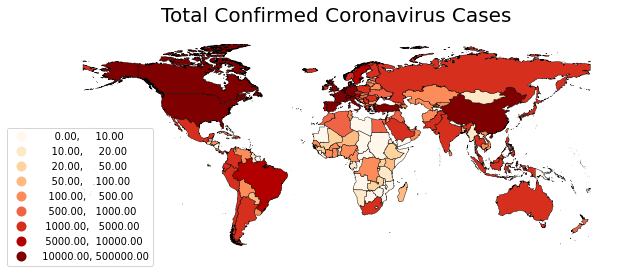

In [16]:
#plot
ax = merge.plot(column = '4/1/20',
               cmap = 'OrRd',
               figsize = (10,10),
               legend = True,
               scheme = 'user_defined',
               classification_kwds = {'bins':[10,20,50,100,500,1000,5000,10000,500000]},
               edgecolor = 'black',
               linewidth= 0.4)
ax.set_title('Total Confirmed Coronavirus Cases',fontdict =
             {'fontsize':20},pad=12.5)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.18 , 0.6))

In [17]:
merge.columns

Index(['NAME', 'geometry', '1/22/20', '1/23/20', '1/24/20', '1/25/20',
       '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       ...
       '1/24/23', '1/25/23', '1/26/23', '1/27/23', '1/28/23', '1/29/23',
       '1/30/23', '1/31/23', '2/1/23', '2/2/23'],
      dtype='object', length=1110)

In [18]:
type(merge.columns)

pandas.core.indexes.base.Index

In [19]:
merge.columns.to_list()[0]

'NAME'

In [20]:
merge.columns.to_list()[1]

'geometry'

In [21]:
merge.columns.to_list()[2]

'1/22/20'

In [22]:
len(merge.columns.to_list())

1110

In [23]:
image_frames = []

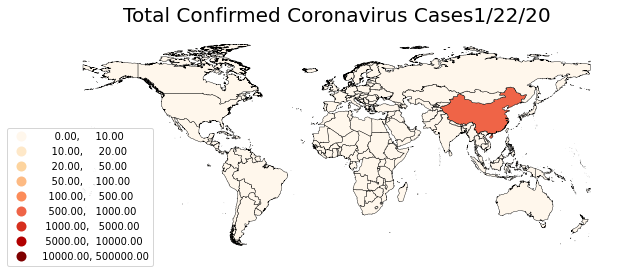

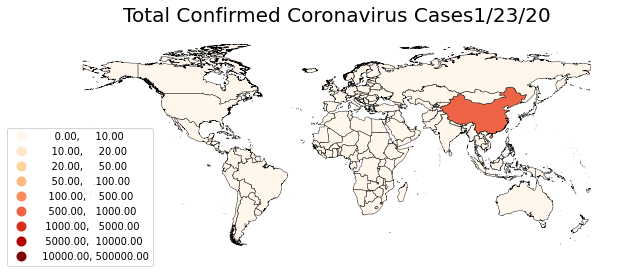

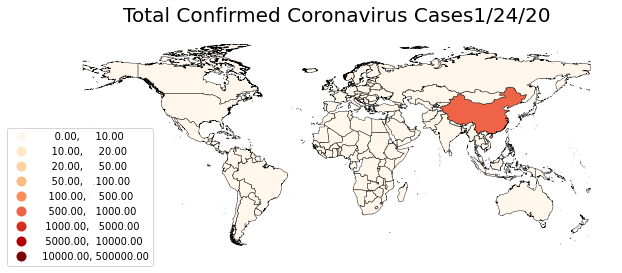

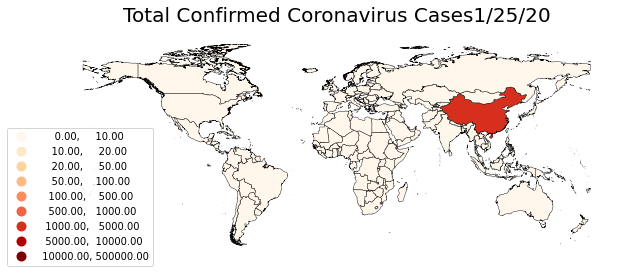

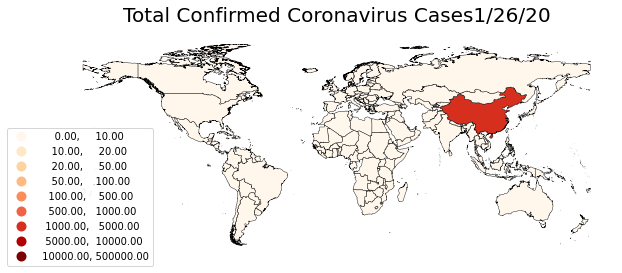

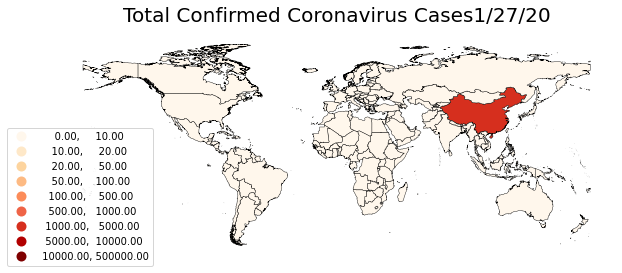

In [24]:
image_frames = []
for dates in merge.columns.to_list()[2:8]:
    ax = merge.plot(column = dates,
               cmap = 'OrRd',
               figsize = (10,10),
               legend = True,
               scheme = 'user_defined',
               classification_kwds = {'bins':[10,20,50,100,500,1000,5000,10000,500000]},
               edgecolor = 'black',
               linewidth= 0.4)
    ax.set_title('Total Confirmed Coronavirus Cases' + dates,fontdict =
             {'fontsize':20},pad=12.5)
    ax.set_axis_off()
    ax.get_legend().set_bbox_to_anchor((0.18 , 0.6))
    img = ax.get_figure()
    
    f = io.BytesIO()
    img.savefig(f,format='png')
    f.seek(0)
    image_frames.append(PIL.Image.open(f))
f.close()
    

In [25]:
image_frames

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=720x720>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=720x720>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=720x720>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=720x720>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=720x720>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=720x720>]

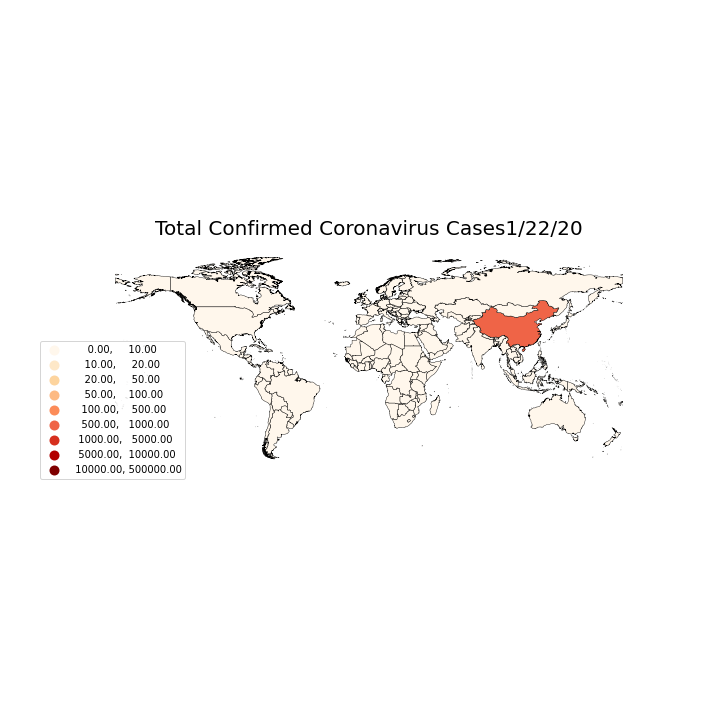

In [26]:
image_frames[0]

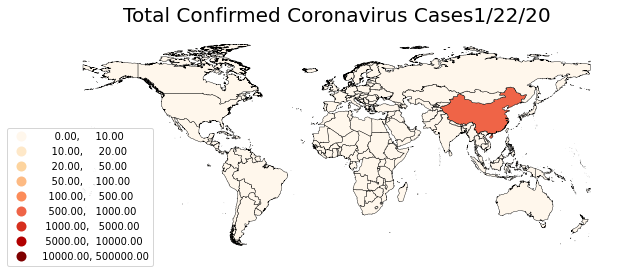

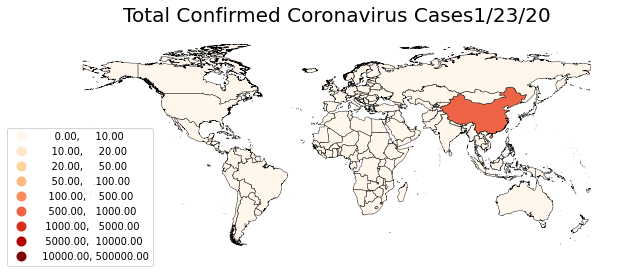

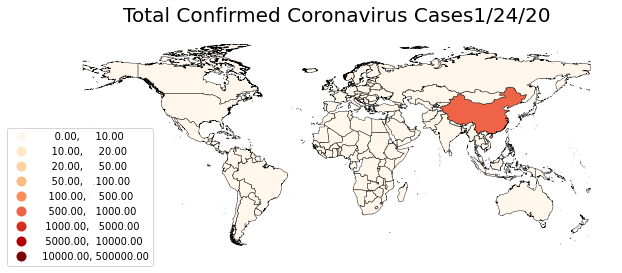

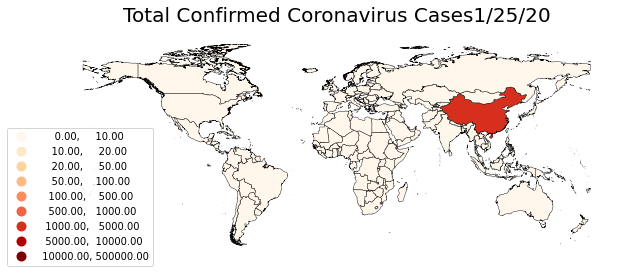

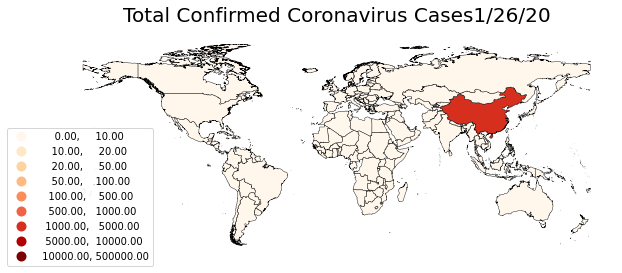

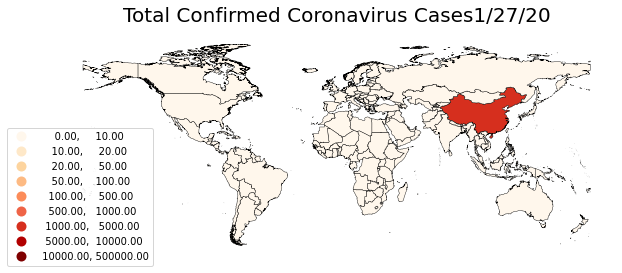

In [27]:
image_frames = []
for dates in merge.columns.to_list()[2:8]:
    ax = merge.plot(column = dates,
               cmap = 'OrRd',
               figsize = (10,10),
               legend = True,
               scheme = 'user_defined',
               classification_kwds = {'bins':[10,20,50,100,500,1000,5000,10000,500000]},
               edgecolor = 'black',
               linewidth= 0.4)
    ax.set_title('Total Confirmed Coronavirus Cases' + dates,fontdict =
             {'fontsize':20},pad=12.5)
    ax.set_axis_off()
    ax.get_legend().set_bbox_to_anchor((0.18 , 0.6))
    img = ax.get_figure()
    
    f = io.BytesIO()
    img.savefig(f,format='png', bbox_inches = 'tight')
    f.seek(0)
    image_frames.append(PIL.Image.open(f))
f.close()
    

ValueError: I/O operation on closed file.

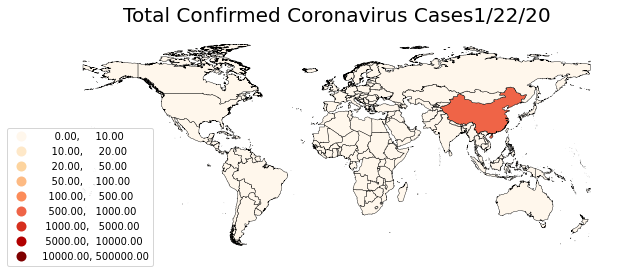

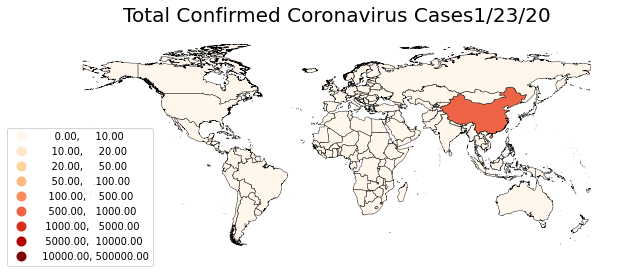

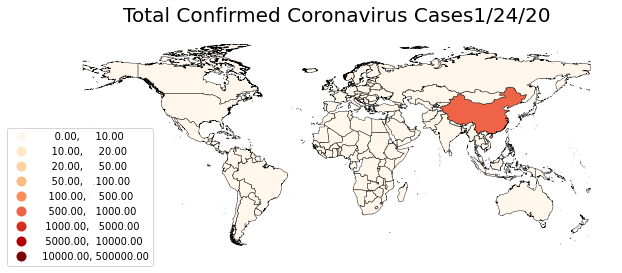

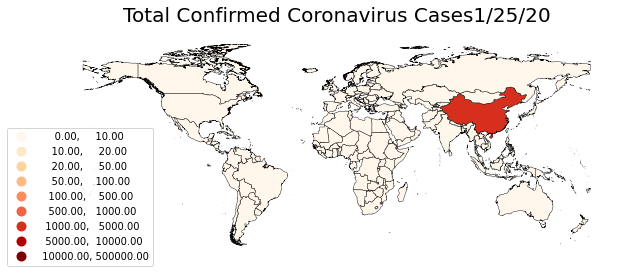

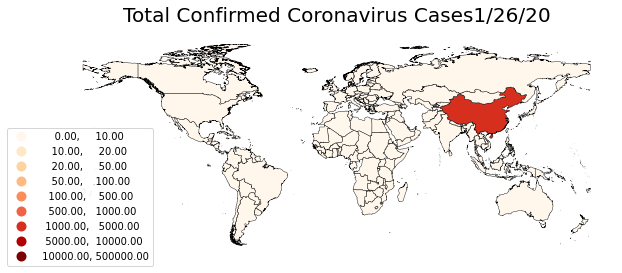

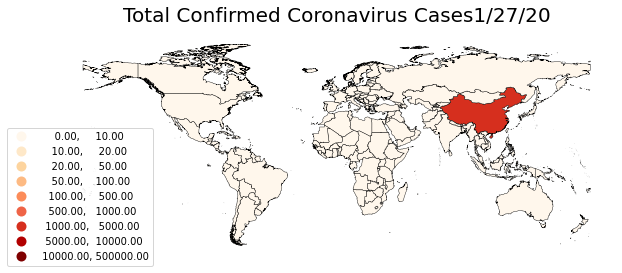

In [28]:
image_frames = []
for dates in merge.columns.to_list()[2:8]:
    ax = merge.plot(column = dates,
               cmap = 'OrRd',
               figsize = (10,10),
               legend = True,
               scheme = 'user_defined',
               classification_kwds = {'bins':[10,20,50,100,500,1000,5000,10000,500000]},
               edgecolor = 'black',
               linewidth= 0.4)
    ax.set_title('Total Confirmed Coronavirus Cases' + dates,fontdict =
             {'fontsize':20},pad=12.5)
    ax.set_axis_off()
    ax.get_legend().set_bbox_to_anchor((0.18 , 0.6))
    img = ax.get_figure()
    
    f = io.BytesIO()
    img.savefig(f,format='png', bbox_inches = 'tight')
    f.seek(0)
    image_frames.append(PIL.Image.open(f))
f.close()

#create a gif animation
image_frames[0].save('Dynamic COVID-19 Map.gif',format = 'GIF',
                     append_images = image_frames[1:],
                     save_all = True, duration = 300,
                     loop = 3)
f.close()